**UNIVERSIDAD NACIONAL DE COLOMBIA SEDE MANIZALES**

Tarea - Procesamiento Digital de Imagenes

Leonar Santiago Castro Vizcaya

co. 817010

#Redes neuronales

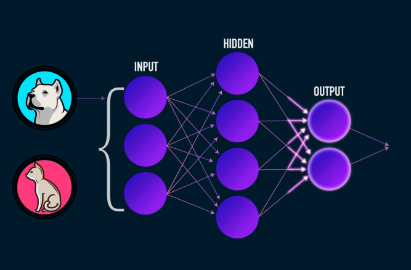

Los algoritmos de redes neuronales están diseñados para imitar el comportamiento del cerebro humano; el propósito de estas generalmente se reduce a 3 aspectos aprender de la experiencia, obtener información según las entradas que se proveen y generalizar lo ya aprendido en nuevos elementos lo que las hace muy valiosas ya que permiten reconocer patrones que de otro modo no podrían ser reconocidos.

##Capas

Las redes neuronales se encuentran conformadas por capas que a su vez cuentan con “neuronas” quienes se conectarán entre sí para enviarse mensajes y poder compartir información que será relevante para determinar el o los outputs correspondientes.

Las capas se encuentran divididas en 3 grupos input, hidden y output.

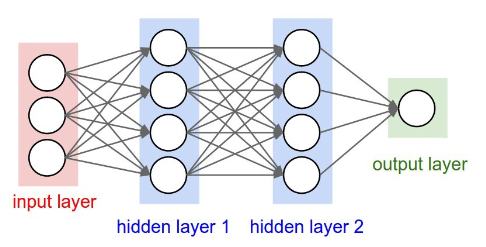

En la capa de input estarán todas nuestras entradas o datos de entrenamiento estos contarán con pesos que permitirán expresar su importancia.

La capa hidden puede estar conformada a su vez por una o varias capas el número de capas dependerá de qué tan sofisticado queremos nuestro modelo sin embargo, es necesario recalcar que mientras más capas se tengan necesitaremos más recursos como tiempo y poder computacional.

La capa de output puede contar con una o varias neuronas dependerá del número de características que se desean llegar a encontrar.

##Funciones de activacion

La función de activación devuelve una salida que será generada por la neurona dada una entrada o conjunto de entradas. Cada una de las capas que conforman la red neuronal tienen una función de activación que permitirá reconstruir o predecir. Además, se debe considerar que en la red neuronal se usará una función no lineal debido a que le permite al el modelo adaptarse para trabajar con la mayor cantidad de datos.

Las funciones de activación se dividen en dos tipos como: lineal y no lineal

###Función Lineal:

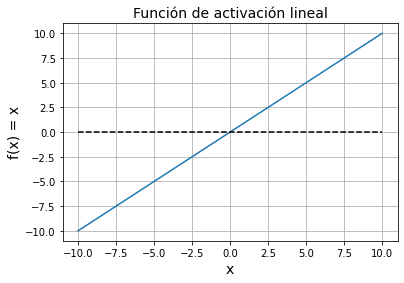

In [51]:
import numpy as np
x = np.linspace(-10, 10, 1000)
def lineal(x):
  return x
plt.plot(x, lineal(x))
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = x', fontsize=14)
plt.title('Función de activación lineal', fontsize=14)

plt.plot(x, np.full(len(x), 0), '--k')

plt.show()

Esta función también conocida como identidad, permite que lo de la entrada sea igual a la salida por lo que si tengo un red neuronal de varias capas y aplicó función lineal se dice que es una regresión lineal. Por lo tanto, esta función de activación lineal se usa si a la salida se requiere una regresión lineal y de esta manera a la red neuronal que se le aplica la función va a generar un valor único. Por ejemplo se usa cuando se solicita predecir el valor de un número de ventas.

###Funciones no lineales:


####Funcion Escalon o Step

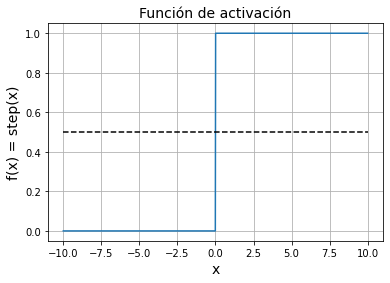

In [52]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)
y = x > 0

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = step(x)', fontsize=14)
plt.title('Función de activación', fontsize=14)
plt.plot(x, np.full(len(x), 0.5), '--k')
plt.show()

Esta función también conocida como escalón, indica que si la x es menor que cero la neurona va a ser cero pero cuando es mayor igual a cero dará como salida igual 1. Esta función se usa cuando se quiere clasificar o cuando se tiene salidas categóricas. Por ejemplo, se puede usar para predecir si compro algo o no.

####Funcion Sigmoide o logistica

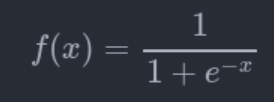

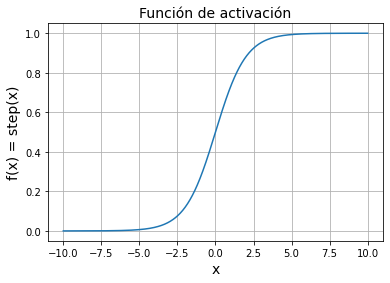

In [54]:
def sigmoid(x):
    return 1 / (1+np.power(np.e,-x))

x = np.linspace(-10, 10, 1000)
y = sigmoid(x)

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = step(x)', fontsize=14)
plt.title('Función de activación', fontsize=14)
#plt.plot(x, np.full(len(x), 0.5), '--k')
plt.show()

* Es continua
* Es derivable
* Va de 0 a 1

Esta función también conocida como función logística, está en un rango de valores de salida está entre cero y uno por lo que la salida es interpretada como una probabilidad. Si se evalúa la función con valores de entrada muy negativos, es decir x<0 la función será igual a cero, si se evalúa en cero la función dará 0.5 y en valores altos su valor es aproximadamente a 1. Por lo que esta función se usa en la última capa y se usa para clasificar datos en dos categorías.

Actualmente la sigmoide no es una función muy utilizada debido a que no está centrada y esto afecta en el aprendizaje y entrenamiento de la neurona por lo que influye con el problema de desaparición de gradiente.

####Funcion Tangente Hiperbólica:


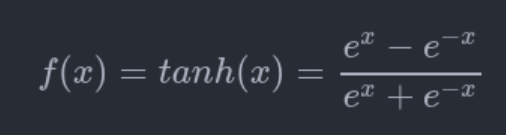

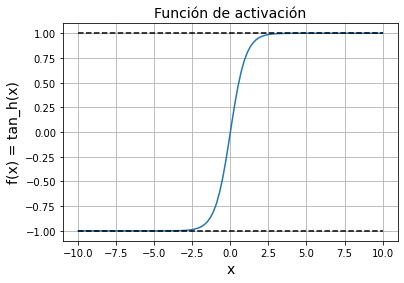

In [45]:
import numpy as np
def tangente_hiperbolica(x):
    return (np.power(np.e, x) - np.power(np.e, -x)) / (np.power(np.e, x) + np.power(np.e, -x))
plt.plot(x, tangente_hiperbolica(x))
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = tan_h(x)', fontsize=14)
plt.title('Función de activación', fontsize=14)

plt.plot(x, np.full(len(x), 1), '--k')
plt.plot(x, np.full(len(x), -1), '--k')
plt.show()

* Es continua
* Es derivable
* Va de -1 a 1
* Media 0 y desviación típica 1

Esta función de activación llamada tangente hiperbólica tiene un rango de valores de salida entre -1 y 1. Se dice que está función es un escalamiento de la función logística, por lo que a pesar que esta función está centrada tiene un problema similar a la sigmoide debido al problema de desaparición del gradiente, que se da cuando en el entrenamiento se genera un error con el algoritmo de propagación hacia atrás y debido a esto el error se va propagando entre las capas, por lo que en cada iteración toma un valor pequeño y la red no puede obtener un buen aprendizaje.



####Funcion Relu

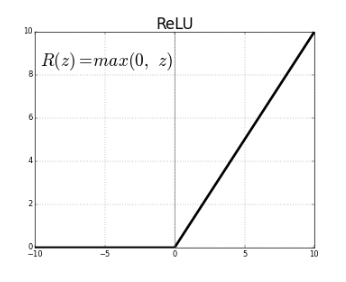

* Es continua
* NO lineal
* NO derivable
* Va de 0 a ∞

Está función es la más utilizada debido a que permite el aprendizaje muy rápido en las redes neuronales. Si a esta función se le da valores de entrada muy negativos el resultado es cero pero si se le da valores positivos queda igual y además el gradiente de esta función será cero en el segundo cuadrante y uno en el primer cuadrante. Cuando se tiene que la función es igual a cero y su derivada también lo es se genera lo que es la muerte de neuronas, a pesar que puede ser un inconveniente en algunos casos permite la regularización Dropout. Por esta razón la función ReLu tiene una variante denominada Leaky ReLu que va a prevenir que existan neuronas muertas debido a la pequeña pendiente que existe cuando x<0.



####Función Softmax


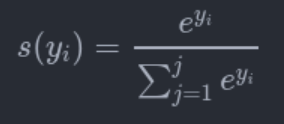

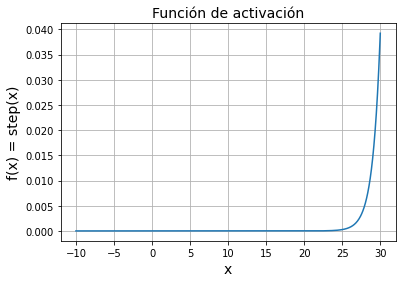

In [77]:
import numpy as np
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0) 
x = np.linspace(-10, 30, 1000)
y = softmax(x)

plt.plot(x, y)
plt.grid(True)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x) = step(x)', fontsize=14)
plt.title('Función de activación', fontsize=14)

plt.show()

Esta función se usa para clasificar data, por ejemplo si le damos de entrada la imagen de una fruta y se solicita saber el tipo de fruta a que pertenece, aplicando softmax la red nos dará la probabilidad de que puede ser 0.3 o 30% melón, 0.2 o 20% sandía y 0.5 o 50% papaya, por lo que nos el resultado será el que tenga mayor probabilidad y cabe recalcar que la suma de estas probabilidades será igual a 1. En otras palabras, Softmax se usa para clases múltiples y cuando se va a asignar probabilidades a cada clase que pertenezca a clases múltiples.

##Funciones de Costo para clasificacion

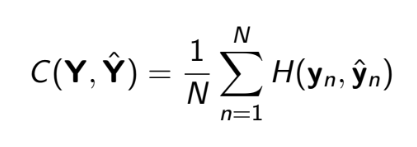

Las funciones de costo permiten evaluar el proceso de aprendizaje en todo el conjunto de entrenmaiento. LA funcion de costo mas comunmente usada es la entropia cruzada

###Entropia cruzada

Funció que calcula la divergencia que existe entre dos distribuciones de
probabilidad (mide que “tan disimilares son”). En modelos de clasificacion, se define como:
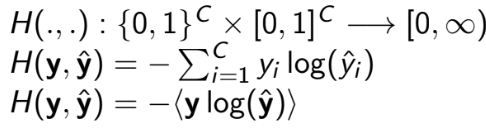

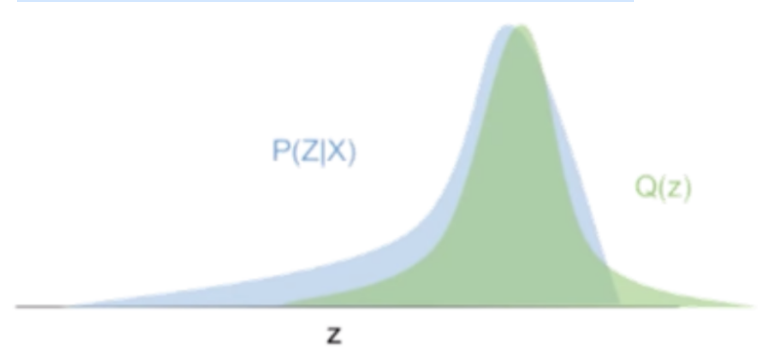

##Entrenamiento y perdida

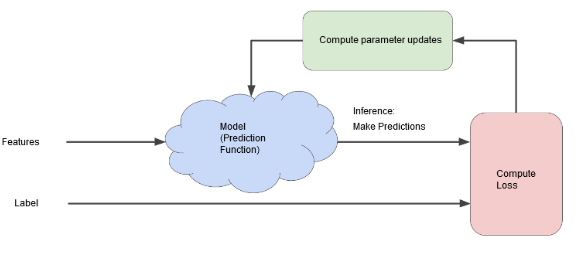

El objetivo de una red neuronal es aprender comportamientos que permitan destacar características de los objetos que se están tomando como input, todo este proceso es llamado Entrenamiento, sin embargo es casi imposible obtener un cien por ciento de predicciones correctas, por lo que a la penalidad por una predicción incorrecta se la llama Pérdida. El que exista pérdida en nuestro modelo no es malo, ya que en caso de no tenerla es muy posible que se esté realizando overfitting, es decir que nuestro modelo es incapaz de generalizar. El objetivo del entrenamiento es medir la pérdida para luego ir iterando hasta que el algoritmo descubra los parámetros del modelo con la pérdida más baja posible una vez que esto ocurra el modelo ha convergido.

##Backpropagation


Backpropagation es el algoritmo que permite cuantificar la influencia que tiene cada peso y bias de la red en sus predicciones. Para conseguirlo, hace uso de la regla de la cadena (chain rule) para calcular el gradiente, que no es más que es el vector formado por las derivadas parciales de una función.

##Descenso de Gradiente



Descenso de gradiente (gradient descent) es un algoritmo de optimización que permite minimizar una función haciendo actualizaciones de sus parámetros en la dirección del valor negativo de su gradiente. Aplicado a las redes neuronales, el descenso de gradiente permite ir actualizando los pesos y bías del modelo para reducir su error.

##Learning Rate

El learning rate o ratio de aprendizaje establece cómo de rápido pueden cambiar los parámetros de un modelo a medida que se optimiza (aprende). Este hiperparámetro es uno de los más complicados de establecer, ya que depende mucho de los datos e interacciona con el resto de hiperparámetros. Si el learning rate es muy grande, el proceso de optimización puede ir saltando de una región a otra sin que el modelo sea capaz de aprender. Si por el contrario, el learning rate es muy pequeño, el proceso de entrenamiento puede tardar demasiado y no llegar a completarse.Algunas de las recomendaciones heurísticas basadas en prueba y error son:

Utilizar un learning rate lo más pequeño posible siempre y cuando el tiempo de entrenamiento no supere las limitaciones temporales disponibles.

No utilizar un valor constante de learning rate durante todo el proceso de entrenamiento. Por lo general, utilizar valores mayores al inicio y pequeños al final.


##Reduccion de la Perdida

Para poder reducir la pérdida es necesario modificar los parámetros (pesos) y volver a recalcular el modelo tal como lo indica la figura anterior.

Uno de los métodos más efectivos para determinar los parámetros con los que obtendremos la menor pérdida sería calcular la pérdida con cada uno de los pesos posibles y luego determinar el punto en el que la pérdida es mínima pero esto conlleva un muy largo tiempo y demasiado poder computacional, por lo que se usa el algoritmo de descenso de gradientes.

El primer paso en el algoritmo de descenso de gradientes es escoger un punto inicial, luego se calculará el gradiente de la curva de pérdida en el punto escogido, para poder escoger el siguiente punto se multiplica la gradiente encontrada por un escalar llamado tasa de aprendizaje que se encuentra entre los valores 0.0 y 1.0.

Este escalar es un hiper parámetro muy importante, usualmente el valor de este es 0.05, controla qué tan rápido el modelo se adapta al problema.

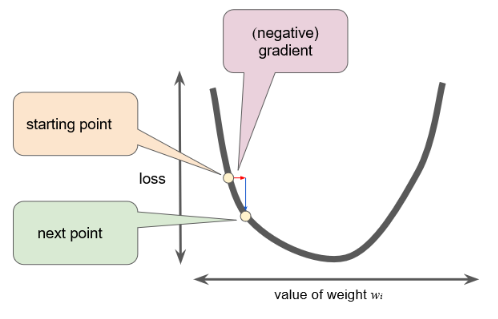




[Ejemplo Interactivo Red Neuronal](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0.3&noise=0&networkShape=4,2&seed=0.77940&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)



#PERCEPTRON

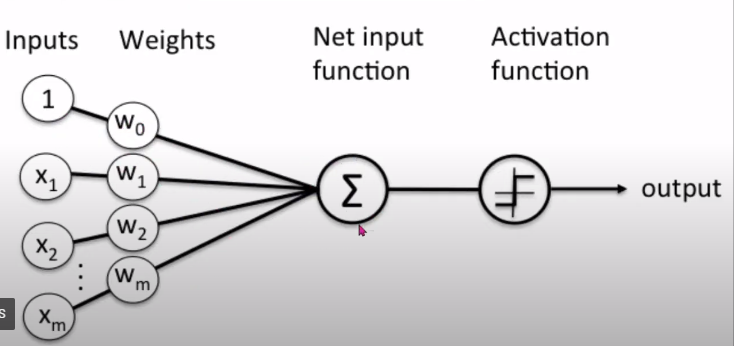

El perceptrón es un algoritmo para el aprendizaje supervisado de clasificadores binarios,  esta inspirado en el funcionamiento de las neuronas biologicas que forman las redes neuronales de nuestro cerebro, recibiendo una serie de señales de entrada y devolviendo un resultado a la salida, calculando una suma ponderada de todas las entradas y aplicando una funcion de activacion, los pesos seran hallados empleando el metodo de gradiente desendiente, de manera que se reduzca al maximo posible la funcion de costo al evaluar el conjunto de salida conocido y el conjunto predicho al evaluar dichos pesos.

Matematicamente se define como:


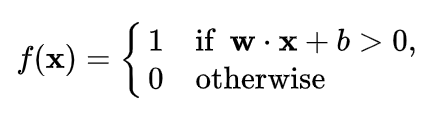

Donde:
* x: Vector de entradas
* w: Vector de pesos
* b: ofset, bias
* w.x: producto punto entre w y x

##Dataset Iris

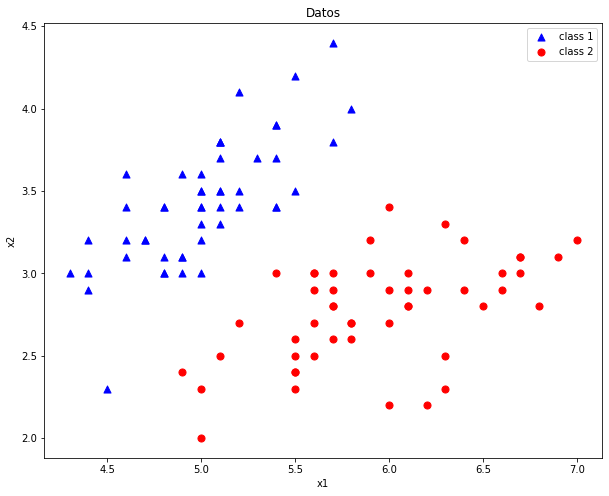

In [81]:
####Importo librerias, dataset a utilizar:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)
X = X[:, :2]
idx = np.bitwise_or(y==0, y==1)
X, y = X[idx], y[idx] #X \in R^{n_samples, 2}, y \in {0,1}^{n_samples}

plt.figure(figsize=(10,8))
plt.scatter(X[:,0][y==0], X[:,1][y==0], s=50, marker='^', c='b', label='class 1')
plt.scatter(X[:,0][y==1], X[:,1][y==1], s=50, marker='o', c='r', label='class 2')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Datos')
plt.savefig('examen_pdi_perceotron.pdf',format='pdf', bbox_inches='tight')

##CLASE PERCEPTRON

In [83]:
class Perceptron():
  def __init__(self, size):
    np.random.seed(47) #semilla de aleatoriedad para efectos practicos
    self.w = np.random.randn(size) #pesos inciciales
    self.ws = []
    
  def step(self, w, x): #Funcion de activacion Step
    return np.dot(x, self.w) > 0 

  def mse(self, Y, Y_): # Funcion de costo Error cuadratico medio
    self.Y = Y
    self.Y_ = Y_

    N = len(self.Y)
    total = 0
    if Y.shape != self.Y_.shape or self.Y.ndim != self.Y_.ndim or self.Y_.ndim != 1 or self.Y.ndim != 1: #Validacion tamaño y dimension
      print("El tamaño de los arreglos debe ser el mismo y la dimension debe ser igual una en cada caso.")
    else:
      for i in range(N):
              
        loss = self.Y[i] - self.Y_[i]       
        mse = (loss)**2
        total += mse
    return total/N

    
  def fit(self, x, y, epochs, lr):
    x = np.c_[np.ones(len(x)), x]
    for epoch in range(epochs):
                
        y_predict = self.step(self.w, x)  #uso de la funcion de activacion
        # función de pérdida (MSE)
        l = self.mse(y, y_predict)
        # derivadas
        dldh = (y_predict - y)
        dhdw = x
        dldw = np.dot(dldh, dhdw)
        # actualizar pesos
        self.w = self.w - lr*dldw
        # guardar pesos para animación
        self.ws.append(self.w.copy())
    return self.w, self.mse(y, y_predict)#RETORNO PESOS Y MSE

In [84]:
perceptron = Perceptron(3) #CREO EL MODELO
epochs, lr = 10000, 0.01  #EPOCAS, LEARNING RATE
w, e = perceptron.fit(X, y, epochs, lr)
print("Pesos: ", w, "mse= ", e )

Pesos:  [-7.46800948  4.78390636 -6.12079203] mse=  0.0


In [85]:
y_predict = perceptron.step(w,np.c_[np.ones(len(X)), X])
y_predict #Etiquetas predichas por el perceptron

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [86]:
y #Etiquetas originales

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [87]:
y == y_predict 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

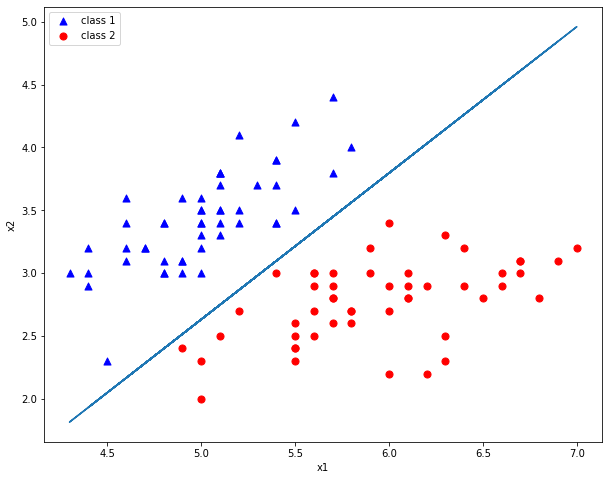

In [88]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0][y==0], X[:,1][y==0], s=50, marker='^', c='b', label='class 1')
plt.scatter(X[:,0][y==1], X[:,1][y==1], s=50, marker='o', c='r', label='class 2')


plt.plot(X[:,0],(X[:,0]*1.166)-3.2)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.savefig('examen_pdi_perceotron.pdf',format='pdf', bbox_inches='tight')

In [47]:
# def train_test_split(X, porc_train):# porcentaje de 0.0 a 1.0
#   shape_train = X.shape[0] * porc_train
#   all_idx = np.arange(0,100,1)
#   indx_train_random =  
#   return shape_train

In [49]:
#train_test_split(X,0.7)

70.0